In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

ln: failed to create symbolic link '/content/data': File exists
Updating fastai...
Done.


In [0]:
import sys
sys.path.append("…/…/")

In [0]:
from fastai.tabular import *

In [0]:
import pandas as pd

In [0]:
df_1 = pd.read_csv('data/train.csv')
df_2 = pd.read_csv('data/validation_set.csv')

In [0]:
df = pd.concat([df_1, df_2], axis = 0)

In [0]:
df_test = pd.read_csv('data/test.csv')

In [0]:
df.to_csv('data/df.csv', index = False)

In [0]:
path = 'data'

In [0]:
procs = [Normalize]

In [0]:
valid_idx = range(len(df)- len(df_2), len(df))

In [0]:
dep_var = 'TARGET'

In [0]:
cont_names = list(df.drop(['TARGET'], axis = 1).columns)

In [0]:

test = (TabularList.from_df(df_test, path=path, cont_names=cont_names, procs=procs))

In [0]:
data = (TabularList.from_df(df, procs=procs, cont_names = cont_names)
                           .split_by_idx(list(valid_idx))
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .add_test(test)
                           .databunch())

In [16]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 1.087578  0.418703  1.221273 -1.017563 ...  0.171228  0.353388 -1.771967 -0.344871]
 [-1.478117 -1.722029  0.116863  0.170316 ...  1.819541  0.89507   1.70502  -1.549028]
 [ 0.617296  0.32919  -0.122119  0.003453 ... -2.009623 -1.50373  -0.30174  -1.770678]
 [-0.656496 -0.1411   -1.583236  1.572341 ... -0.132947 -1.339018  0.73272   0.771904]
 [-0.036338  0.548566 -1.093205 -0.238245 ...  0.113556  0.541307  0.587463 -0.652837]]
[3599. 5446. 1195.  151. 3958.]


In [17]:
data.show_batch()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,target
-0.1070,0.4141,-1.4114,0.9289,-1.2737,0.4455,1.2041,-0.2855,-0.2717,0.6758,-0.2695,0.4522,0.5462,-0.3115,0.3899,-0.3196,-0.4151,0.2861,-0.4236,-0.2474,0.1478,0.2657,0.5653,-0.2185,0.1875,0.5875,0.9344,2995.0
-1.0181,-0.2210,-0.9135,0.7766,-0.8919,0.4685,1.7706,0.2219,0.1586,0.0995,0.0365,-0.0761,0.2910,0.0834,1.3126,0.0578,0.6415,-0.2220,0.4512,0.8685,-1.0154,0.5035,0.0260,0.2340,0.1089,0.5004,0.9499,2628.0
-0.8909,1.1107,-0.1769,0.8334,0.7058,-0.7151,-0.4377,-0.5601,0.9425,-0.4022,-0.8196,-1.3345,-0.3657,0.8193,-0.1437,-1.6617,0.5159,1.6735,1.6345,1.4605,-1.7165,0.7810,-1.3792,1.2772,1.9462,1.3079,-1.7824,5709.0
-1.0203,-1.2570,-1.8759,0.9785,-1.2107,-0.6074,1.7887,0.9408,0.7896,0.5558,-0.0585,0.0196,0.1606,-0.1432,-0.2733,-0.2471,-0.2195,-0.0966,0.2648,-0.1601,-0.3798,-1.0061,-0.0766,-0.0181,-0.0774,0.9185,0.9259,2852.0
0.3338,1.2398,-0.9332,-1.3332,-0.3609,-0.1071,0.9700,-0.4857,-0.6998,-0.1312,0.5275,-0.3027,0.0569,-0.4971,-1.2679,-1.4319,0.4646,1.6336,1.3200,-1.2948,-1.6036,0.3286,-1.3059,1.2935,1.5517,1.1037,0.7799,4998.0


In [0]:
learn = tabular_learner(data, layers=[1000, 500, 500], metrics=[r2_score, rmse], emb_drop=0.4)

In [19]:
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 1000)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


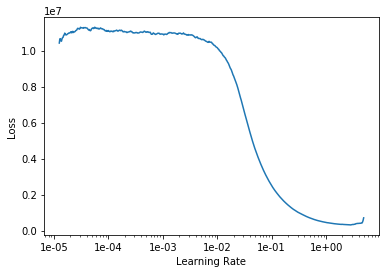

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(100, 1e-1)

epoch,train_loss,valid_loss,r2_score,root_mean_squared_error,time
0,3470593.000000,1681418.875000,0.085764,1296.407837,00:04
1,80334.093750,1617891.500000,0.205269,451.057800,00:03
2,74462.562500,34151.875000,0.982064,175.231796,00:04
3,66172.820312,41609.566406,0.978407,178.417786,00:04
4,65833.132812,33829.226562,0.981763,182.778259,00:04
5,68679.664062,23989.158203,0.987002,153.479752,00:04
6,79761.343750,45069.050781,0.975666,211.263474,00:03
7,78106.281250,3184071.750000,-0.838744,732.323242,00:03
8,71197.921875,475262.687500,0.756162,303.706177,00:04
9,75746.109375,8560829.000000,-2.816757,744.371521,00:03


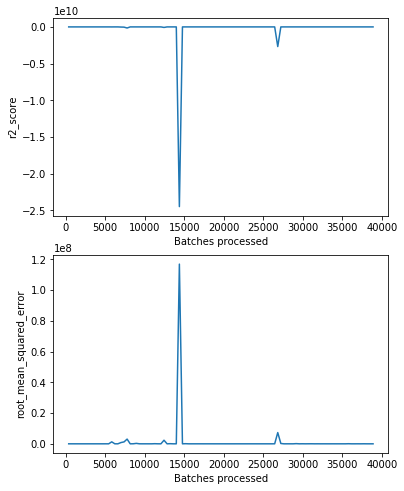

In [22]:
learn.recorder.plot_metrics()

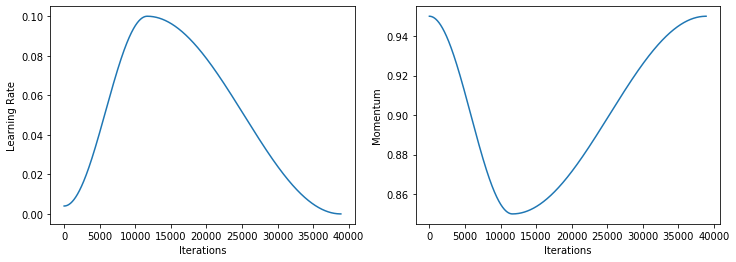

In [23]:
learn.recorder.plot_lr(show_moms=True)

In [42]:
predictions_val = learn.get_preds(ds_type=DatasetType.Valid)

In [25]:
predictions_test = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
predictions_val = [i.item() for i in predictions_val[0]]
predictions_test = [i.item() for i in predictions_test[0]]

In [0]:
sub1 = pd.DataFrame(np.column_stack([df_2['TARGET'], predictions_val]), columns = ['Actual', 'Predicted'])
sub1.to_csv('data/regression_fastaitabular_insample.csv', index = False)

In [0]:
sub2 = pd.DataFrame(np.column_stack([df_test['TARGET'], predictions_test]), columns = ['Actual', 'Predicted'])
sub1.to_csv('data/regression_fastaitabular_outofsample.csv', index = False)